In [1]:
import torch

In [2]:
model_path = "/net/scratch/ijain1/finetuning_unconditional_final_model-loss"
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained(model_path,low_cpu_mem_usage=False, device_map=None)

/home/ijain1/miniconda3/envs/diffsat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The config attributes {'attn_norm_num_groups': None, 'downsample_type': 'conv', 'dropout': 0.0, 'num_train_timesteps': None, 'upsample_type': 'conv'} were passed to UNet2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at /net/scratch/ijain1/finetuning_unconditional_final_model-loss/unet were not used when initializing UNet2DModel: ['down_blocks.4.attentions.1.to_q.bias', 'down_blocks.4.attentions.1.to_k.bias', 'up_blocks.1.attentions.0.to_k.weight', 'mid_block.attentions.0.to_q.bias', 'up_blocks.1.attentions.1.to_q.bias', 'down_blocks.4.attentions.0.to_v.bias', 'mid_block.attentions.0.to_k.weight', 'down_blocks.4.attentions.0.to_ou

In [3]:
generator.unet.config["out_channels"]

3

In [4]:
image = generator().images[0]

100%|██████████| 1000/1000 [02:50<00:00,  5.85it/s]


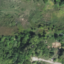

In [5]:
image

In [6]:
import torch
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

In [11]:
from diffusers import UNet2DConditionModel

model_id = model_path
unet = UNet2DConditionModel.from_pretrained(
    model_path,
    subfolder="unet",
    out_channels=5,
    low_cpu_mem_usage=False,
    ignore_mismatched_sizes=True,
    use_safetensors=True,
)

The config attributes {'attn_norm_num_groups': None, 'downsample_type': 'conv', 'dropout': 0.0, 'num_train_timesteps': None, 'upsample_type': 'conv'} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at /net/scratch/ijain1/finetuning_unconditional_final_model-loss were not used when initializing UNet2DConditionModel: ['down_blocks.4.attentions.1.to_q.bias', 'down_blocks.4.attentions.1.to_k.bias', 'up_blocks.1.attentions.0.to_k.weight', 'mid_block.attentions.0.to_q.bias', 'up_blocks.1.attentions.1.to_q.bias', 'down_blocks.4.attentions.0.to_v.bias', 'mid_block.attentions.0.to_k.weight', 'down_blocks.4.attentions.0.to_out.0.bias', 'down_blocks.4.attentions.1.to_k.weight', 'down_blocks.4.attentions.0.to_q.bias', 'up_blocks.1.attentions.0.to_out.0.bias', 'mid_block.attentions.0.group_norm.weight', 'up_blocks.1.attentions.2.to_out.0.weight', 'mid_block.attentions.0.to_k.bias',

In [12]:
unet.eval()

UNet2DConditionModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (c

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet.to(device)

UNet2DConditionModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (c

In [14]:
import numpy as np

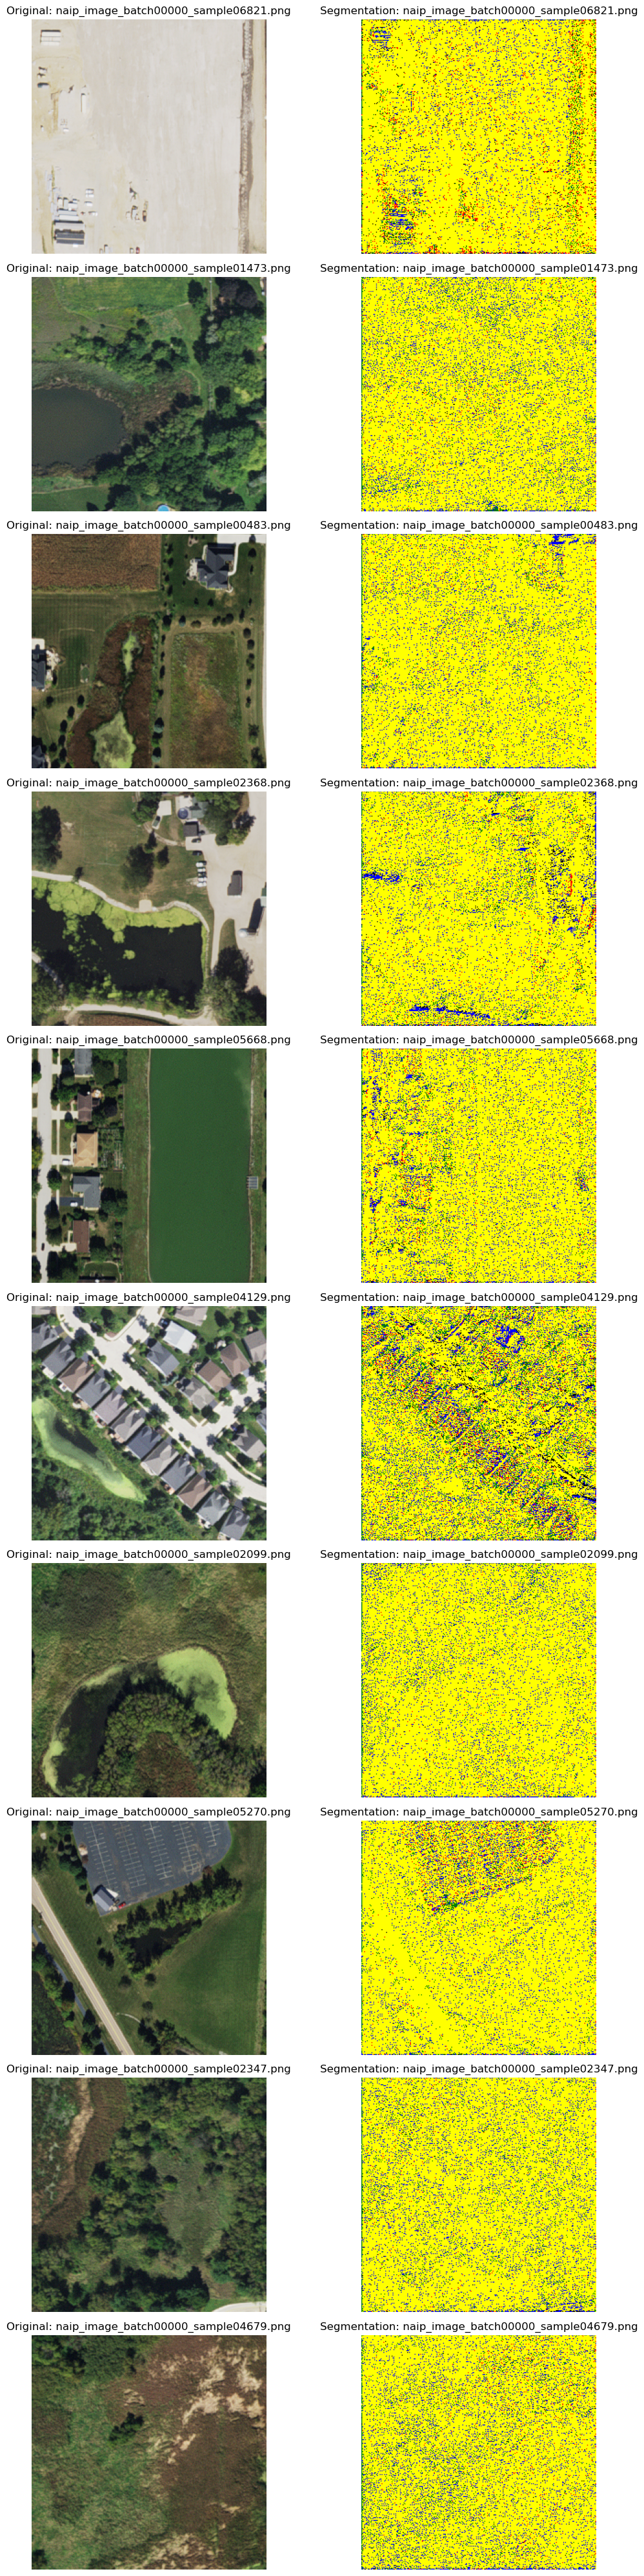

In [18]:
# Define the image transformation

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust size as needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet.to(device)

# Directory containing your sample images
sample_dir = "/net/scratch/ijain1/naip_dataset/kc_and_naip"

def process_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    # Create dummy timestep and encoder_hidden_states
    batch_size = input_tensor.shape[0]
    timestep = torch.zeros(batch_size, dtype=torch.long, device=device)
    
    # Adjust these dimensions based on the model's requirements
    encoder_hidden_states = torch.randn(batch_size, 77, 1280, device=device)
    
    with torch.no_grad():
        output = unet(input_tensor, timestep, encoder_hidden_states)
    
    # Assuming output.sample is the tensor we want
    if hasattr(output, 'sample'):
        segmentation_map = output.sample.squeeze().cpu().numpy()
    else:
        # If there's no 'sample' attribute, let's print what attributes are available
        print(f"Available attributes: {dir(output)}")
        raise AttributeError("Unexpected output structure from UNet2DConditionModel")
    
    return image, segmentation_map

image_files = [f for f in os.listdir(sample_dir) if f.lower().endswith(('.png'))]
num_samples = 10  # Number of images to test
selected_files = random.sample(image_files, min(num_samples, len(image_files)))

# Process the selected images
results = []
for image_file in selected_files:
    image_path = os.path.join(sample_dir, image_file)
    try:
        original_image, seg_map = process_image(image_path)
        results.append((image_file, original_image, seg_map))
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")
        # Print more details about the output
        try:
            output = unet(transform(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device),
                          torch.zeros(1, dtype=torch.long, device=device),
                          torch.randn(1, 77, 1280, device=device))
            print(f"Output type: {type(output)}")
            print(f"Output attributes: {dir(output)}")
            if hasattr(output, 'sample'):
                print(f"Output.sample shape: {output.sample.shape}")
        except Exception as inner_e:
            print(f"Error while debugging: {str(inner_e)}")


# Visualize results
if results:
    fig, axes = plt.subplots(len(results), 2, figsize=(12, 4*len(results)))
    
    # Define colors for each class
    colors = ['red', 'green', 'blue', 'yellow','black']
    
    for i, (image_file, original_image, seg_map) in enumerate(results):
        axes[i, 0].imshow(original_image)
        axes[i, 0].set_title(f"Original: {image_file}")
        axes[i, 0].axis('off')
        
        # Create a color-coded segmentation map
        color_seg_map = np.zeros((seg_map.shape[1], seg_map.shape[2], 3))
        seg_map_argmax = np.argmax(seg_map, axis=0)
        for j, color in enumerate(colors):
            color_seg_map[seg_map_argmax == j] = plt.cm.colors.to_rgb(color)
        
        axes[i, 1].imshow(color_seg_map)
        axes[i, 1].set_title(f"Segmentation: {image_file}")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No images were successfully processed.")

In [7]:
from diffusers import StableDiffusionPipeline

model_path = "/net/scratch/ijain1/diffusion_sat_final_model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16,low_cpu_mem_usage=False, 
                                   device_map=None)
pipe.to("cuda")

image = pipe(prompt="jynx pokemon").images[0]
image.save("yoda-pokemon-1.png")

The config attributes {'image_encoder': [None, None]} were passed to StableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'image_encoder': [None, None]} are not expected by StableDiffusionPipeline and will be ignored.
The config attributes {'timestep_spacing': 'leading'} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The config attributes {'addition_time_embed_dim': None, 'attention_type': 'default', 'dropout': 0.0, 'encoder_hid_dim_type': None, 'num_attention_heads': None, 'reverse_transformer_layers_per_block': None, 'transformer_layers_per_block': 1} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


KeyboardInterrupt: 

In [6]:
from diffusers import UNet2DConditionModel

model_id = model_path
unet = UNet2DConditionModel.from_pretrained(
    model_path,
    subfolder="unet",
    out_channels=4,
    low_cpu_mem_usage=False,
    ignore_mismatched_sizes=True,
    use_safetensors=True,
)

The config attributes {'attn_norm_num_groups': None, 'downsample_type': 'conv', 'dropout': 0.0, 'num_train_timesteps': None, 'upsample_type': 'conv'} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at /net/scratch/ijain1/finetuning_unconditional_final_model-loss were not used when initializing UNet2DConditionModel: ['up_blocks.1.attentions.1.to_q.bias', 'up_blocks.1.attentions.1.to_out.0.bias', 'up_blocks.1.attentions.2.to_out.0.weight', 'down_blocks.4.attentions.1.to_v.weight', 'up_blocks.1.attentions.1.to_v.weight', 'up_blocks.1.attentions.0.to_v.bias', 'up_blocks.1.attentions.2.to_k.bias', 'up_blocks.1.attentions.1.to_out.0.weight', 'up_blocks.1.attentions.1.to_k.weight', 'down_blocks.4.attentions.0.to_k.bias', 'mid_block.attentions.0.to_q.bias', 'up_blocks.1.attentions.2.to_q.bias', 'up_blocks.1.attentions.1.to_q.weight', 'mid_block.attentions.0.to_q.weight', 'up_b

In [1]:
from diffusers import StableDiffusionPipeline

model_path = "/net/scratch/ijain1/diffusion_sat_final_model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16,low_cpu_mem_usage=False, 
                                   device_map=None)
pipe.to("cuda")

image = pipe(prompt="jynx pokemon").images[0]
image.save("yoda-pokemon-1.png")

/home/ijain1/miniconda3/envs/diffsat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The config attributes {'addition_time_embed_dim': None, 'attention_type': 'default', 'dropout': 0.0, 'encoder_hid_dim_type': None, 'num_attention_heads': None, 'reverse_transformer_layers_per_block': None, 'transformer_layers_per_block': 1} were passed to UNet2DModel, but are not expected and will be ignored. Please verify your config.json configuration file.


ValueError: cross_attention_dim must be specified for CrossAttnDownBlock2D

In [31]:
import torch
from diffusers import UNet2DModel, DDPMScheduler
from PIL import Image
import numpy as np

# Load the model and scheduler (use the method that worked for you)
unet = UNet2DModel.from_pretrained("/net/scratch/ijain1/diffusion_sat_final_model/unet", 
                                   low_cpu_mem_usage=False, 
                                   device_map=None)
scheduler = DDPMScheduler.from_pretrained("/net/scratch/ijain1/diffusion_sat_final_model/scheduler")

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
unet.to(device)

In [38]:
# Set up generation parameters
image_size = 128  # or whatever size you trained on
batch_size = 1
num_inference_steps = 1000  # You can adjust this, fewer steps = faster but potentially lower quality

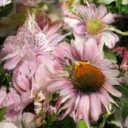

In [39]:
# Generate random noise
noise = torch.randn(
    (batch_size, unet.config.in_channels, image_size, image_size)
).to(device)

# Set number of steps
scheduler.set_timesteps(num_inference_steps)

# Denoise the image
image = noise
for t in scheduler.timesteps:
    # Predict the noise residual
    with torch.no_grad():
        noise_pred = unet(image, t).sample
    
    # Update sample with step
    image = scheduler.step(noise_pred, t, image).prev_sample

# Convert to PIL Image
image = (image / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()
image = (image * 255).round().astype("uint8")
image = Image.fromarray(image[0])

In [ ]:
image